Data types:  
https://towardsdatascience.com/7-data-types-a-better-way-to-think-about-data-types-for-machine-learning-939fae99a689  
https://www.datacamp.com/community/tutorials/categorical-data

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)

In [2]:
file = '../Week7/expedia-hotel-recommendations/train.csv'

n = 37670293 # number of records in file
s = 10000 # desired sample size
skip = sorted(random.sample(range(n), n-s))
colNames = pd.read_csv(file, nrows=1).columns
ranDF = pd.read_csv(file, skiprows=skip, names=colNames)

In [3]:
ranDF.shape

(10001, 24)

In [4]:
ranDF.dropna(axis=0, inplace=True)

In [5]:
ranDF.shape

(6374, 24)

In [6]:
ranDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 10000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  6374 non-null   object 
 1   site_name                  6374 non-null   int64  
 2   posa_continent             6374 non-null   int64  
 3   user_location_country      6374 non-null   int64  
 4   user_location_region       6374 non-null   int64  
 5   user_location_city         6374 non-null   int64  
 6   orig_destination_distance  6374 non-null   float64
 7   user_id                    6374 non-null   int64  
 8   is_mobile                  6374 non-null   int64  
 9   is_package                 6374 non-null   int64  
 10  channel                    6374 non-null   int64  
 11  srch_ci                    6374 non-null   object 
 12  srch_co                    6374 non-null   object 
 13  srch_adults_cnt            6374 non-null   int6

* date_time: DoW? MoY?
* site_name: 2 or not 2  
* posa_continent: 3 or not 3
* user_location_country: 66 (15% 205)
* user_location_region: as is, or group everything >500
* user_location_city: good 👍
* orig_destination_distance: skews right, transform?
* user_id: ignore for modeling (unless, counts?)
* is_mobile: binary
* is_package: binary
* channel: 9 or not 9 (or leave as-is?)
* srch_ci / srch_co: maybe time difference (length of stay) or DoW?
* srch_adults_cnt: good 👍
* srch_children_cnt: good 👍
* srch_rm_cnt: good 👍
* srch_destination_id: as-is or group (0-1k, 1k-2k, 2k+ or 2k-3k and 3k+)?? or remove?
* srch_destination_type_id: good 👍
* is_booking: binary
* cnt: good (skews, transform maybe?)
* hotel_continent: probably good (dummies) or 2/not2?
* hotel_country: 50, not 50
* hotel_market: idk... 0-500, 500-1k, 1k+?
* hotel_cluster: TARGET VARIABLE

In [7]:
ranDF.user_location_region.value_counts()

174    1038
348     416
354     351
442     347
220     338
       ... 
234       1
438       1
217       1
358       1
419       1
Name: user_location_region, Length: 146, dtype: int64

In [8]:
len(ranDF.user_location_region.unique())

146

In [9]:
942/6374

0.14778788829620332

In [10]:
import matplotlib.pyplot as plt

(array([1.970e+02, 4.500e+01, 1.000e+00, 2.600e+01, 3.440e+02, 2.000e+00,
        6.000e+00, 5.000e+00, 1.093e+03, 3.000e+00, 0.000e+00, 1.020e+02,
        5.100e+01, 3.700e+01, 1.000e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 3.450e+02, 1.310e+02, 5.000e+00, 3.000e+00, 0.000e+00,
        2.800e+01, 1.600e+01, 2.500e+01, 2.240e+02, 4.500e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.900e+01, 2.600e+01,
        2.400e+01, 0.000e+00, 0.000e+00, 1.380e+02, 1.110e+02, 1.190e+02,
        1.430e+02, 3.000e+01, 1.470e+02, 1.820e+02, 2.600e+01, 8.200e+01,
        5.360e+02, 3.790e+02, 7.200e+01, 1.190e+02, 8.000e+00, 1.000e+00,
        4.000e+00, 3.000e+00, 9.400e+01, 4.000e+00, 4.900e+01, 2.000e+00,
        6.400e+01, 3.000e+00, 2.400e+01, 3.400e+01, 1.000e+00, 4.000e+00,
        5.000e+00, 1.000e+00, 5.500e+01, 3.510e+02, 1.610e+02, 1.000e+00,
        2.000e+00, 1.000e+01, 2.600e+02, 5.100e+01, 2.500e+01, 2.000e+00,
        1.700e+01, 0.000e+00, 0.000e+0

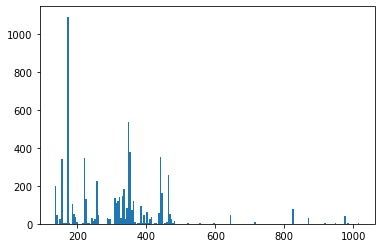

In [11]:
plt.hist(ranDF['user_location_region'], bins=200)

In [12]:
# ranDF.user_location_region.value_counts().head(60)

In [13]:
ranDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 10000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  6374 non-null   object 
 1   site_name                  6374 non-null   int64  
 2   posa_continent             6374 non-null   int64  
 3   user_location_country      6374 non-null   int64  
 4   user_location_region       6374 non-null   int64  
 5   user_location_city         6374 non-null   int64  
 6   orig_destination_distance  6374 non-null   float64
 7   user_id                    6374 non-null   int64  
 8   is_mobile                  6374 non-null   int64  
 9   is_package                 6374 non-null   int64  
 10  channel                    6374 non-null   int64  
 11  srch_ci                    6374 non-null   object 
 12  srch_co                    6374 non-null   object 
 13  srch_adults_cnt            6374 non-null   int6

In [14]:
df1 = ranDF.copy()

In [15]:
# change data types
def change_dtype(cols, to_dtype, df=df1):
    for col in cols:
        df[col] = df[col].astype(to_dtype)

In [16]:
# Get list of date formatted columns
datCols = ['date_time', 'srch_ci', 'srch_co']

# Get list of categorical variable columns
catCols = ['site_name', 'posa_continent', 'user_location_country', 
           'user_location_region', 'user_location_city', 'user_id', 
           'channel', 'srch_destination_id', 'srch_destination_type_id', 
           'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster']

# Get list of continuous variable columns
numCols = ['orig_destination_distance', 'srch_adults_cnt', 'srch_children_cnt', 
           'srch_rm_cnt', 'cnt']
           
# List of yes/no binary variable columns
ynCols = ['is_mobile', 'is_package', 'is_booking']

In [17]:
change_dtype(catCols, 'category', df1)
change_dtype(ynCols, 'int8', df1)
change_dtype(datCols, 'datetime64', df1)

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 10000
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  6374 non-null   datetime64[ns]
 1   site_name                  6374 non-null   category      
 2   posa_continent             6374 non-null   category      
 3   user_location_country      6374 non-null   category      
 4   user_location_region       6374 non-null   category      
 5   user_location_city         6374 non-null   category      
 6   orig_destination_distance  6374 non-null   float64       
 7   user_id                    6374 non-null   category      
 8   is_mobile                  6374 non-null   int8          
 9   is_package                 6374 non-null   int8          
 10  channel                    6374 non-null   category      
 11  srch_ci                    6374 non-null   datetime64[ns]
 12  srch_

In [19]:
df1.date_time.dt.day_name().value_counts()

Tuesday      1074
Wednesday    1026
Monday       1024
Thursday      882
Friday        831
Sunday        811
Saturday      726
Name: date_time, dtype: int64

In [20]:
df1.date_time.dt.month_name().value_counts()

August       665
July         642
September    641
October      615
December     596
June         579
November     562
May          497
April        489
March        462
February     332
January      294
Name: date_time, dtype: int64

In [21]:
len(df1[(df1['site_name'] == 2)])

4812

In [22]:
df1['site_name'] == 2

0         True
1         True
2        False
3         True
5         True
         ...  
9991      True
9992      True
9993      True
9994      True
10000     True
Name: site_name, Length: 6374, dtype: bool

In [23]:
# testDF = df1.copy()

In [24]:
# testDF['site_name'] = testDF['site_name'].replace

In [25]:
# testDF.loc[testDF['site_name'] == 2, 'site_name']

In [26]:
# def cat_to_binary(row, col, val):
#     if row[col] == val:
#         return 1
#     return 0

In [27]:
# testDF.apply(lambda row: cat_to_binary(row, 'site_name', 2), axis=1)

In [28]:
# testDF.site_name

In [29]:
# df2['site_name_2'] = df1.apply(lambda row: cat_to_binary(row, 'site_name', 2), axis=1)

In [30]:
# df2['posa_continent_3'] = df1.apply(lambda row: cat_to_binary(row, 'posa_continent', 3), axis=1)

In [31]:
# df2['user_location_country_66'] = df1.apply(lambda row: cat_to_binary(row, 'user_location_country', 66), axis=1)

In [32]:
# def bin_vals(row, col, val):
#     if row[col] > val:
#         return val
#     return row[col]

In [33]:
# df2['user_location_region'] = df1.apply(lambda row: bin_vals(row, 'user_location_region', 500), axis=1)

In [34]:
# df2['user_location_city'] = df1['user_location_city']

In [35]:
# df2['orig_destination_distance'] = df1['orig_destination_distance']

In [36]:
# df2['is_mobile'] = df1['is_mobile']

In [37]:
# df2['is_package'] = df1['is_package']

In [38]:
# df2['channel'] = df1['channel']

In [39]:
# testDF = df1.copy()

In [40]:
# testDF['user_location_region'].head()

In [41]:
# testDF['user_location_region'].value_counts()

In [42]:
# test = testDF['user_location_region'].map(testDF['user_location_region'].value_counts())
# test

In [43]:
# test = testDF['user_location_region'].groupby(testDF['user_location_region']).transform('count')
# test

In [44]:
# # PROBABLY THIS ... nope 
# test = testDF.groupby(['user_location_region'])['user_location_region'].transform('count')
# test

In [45]:
# len(testDF['user_location_region'].value_counts())

In [46]:
# testDF['user_location_region'].apply(testDF['user_location_region'].value_counts)

In [47]:
# df1['user_location_region'].value_counts()

* date_time: DoW? MoY?
* site_name: 2 or not 2  
* posa_continent: 3 or not 3
* user_location_country: 66 (15% 205)
* ?bin? user_location_region: as is, or group everything >500? [146 unique regions]
* ?bin? user_location_city: good? [1814 unique vals] 😯
* ?xform? orig_destination_distance: skews right, transform?
* user_id: ignore for modeling (unless, counts?) <-- can't figure this out :(
* is_mobile: binary
* is_package: binary
* channel: 9 or not 9 (or leave as-is?)
* srch_ci / srch_co: maybe time difference (length of stay) or DoW?
* srch_adults_cnt: good 👍
* srch_children_cnt: good 👍
* srch_rm_cnt: good 👍
* ?bin? srch_destination_id: as-is or group (0-1k, 1k-2k, 2k+ or 2k-3k and 3k+)?? or remove?
* srch_destination_type_id: good 👍
* is_booking: binary
* ?xform? cnt: good (skews, transform maybe?)
* ?binary? hotel_continent: probably good (dummies) or 2/not2?
* hotel_country: 50, not 50
* ?bin? hotel_market: idk... 0-500, 500-1k, 1k+?
* hotel_cluster: TARGET VARIABLE

In [48]:
# df2['srch_ci_DoW'] = df1.srch_ci.dt.day_name()
# df2['srch_co_DoW'] = df1.srch_co.dt.day_name()
# df2['length_of_stay'] = (df1['srch_co'] - df1['srch_ci'])

In [49]:
# df2['srch_adults_cnt'] = df1['srch_adults_cnt']
# df2['srch_children_cnt'] = df1['srch_children_cnt']
# df2['srch_rm_cnt'] = df1['srch_rm_cnt']
# df2['srch_destination_id'] = df1['srch_destination_id']
# df2['srch_destination_type_id'] = df1['srch_destination_type_id']
# df2['is_booking'] = df1['is_booking']
# df2['cnt'] = df1['cnt']
# df2['hotel_continent'] = df1['hotel_continent']

In [50]:
# df2['hotel_country'] = df1.apply(lambda row: cat_to_binary(row, 'hotel_country', 50), axis=1)

In [51]:
# df2['hotel_market'] = df1['hotel_market']
# df2['hotel_cluster'] = df1['hotel_cluster']

In [52]:
# df2

(array([101., 164., 211.,  49.,  50.,  51.,  27.,  31.,  22.,  22., 214.,
        181.,  13.,   6.,  51.,   4.,   4.,   8., 153.,  57., 136.,  31.,
          4.,  30.,   6.,   8.,  48.,   5.,   8.,  20.,   1.,   6.,   1.,
         97., 440.,  72.,  49., 112., 129.,  74.,  23.,  20.,  20.,  16.,
          2.,  17.,  12.,  16.,  15.,  14.,  23.,  20.,  17.,  11.,  19.,
         35.,  19.,  11.,   4., 413., 173.,  74., 222., 318., 310., 114.,
        263.,  25.,  15.,  15.,  29.,  36.,  17.,   8.,   9.,   4.,  10.,
          5.,   2.,   5.,   2.,   1.,   3.,   1.,   9.,   2.,   8.,   9.,
          2.,  15.,  22.,  16.,   4.,   6.,   4.,   8.,  21.,  11.,   8.,
         15.,   1.,   1.,   4.,   8.,   7.,   5.,   4.,   3.,  10.,   4.,
          4.,  16.,   2.,   6.,   2.,   0., 105.,  68.,   4.,  36.,   7.,
          4.,   6.,   2.,   2.,   6.,   0.,   0.,   4.,   5.,   2.,   2.,
         15.,   8.,  12.,   2.,  11.,  31.,  46.,   4.,  30.,  15., 166.,
         22.,   9.,  66.,  27.,  13., 

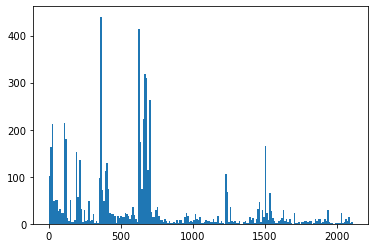

In [53]:
plt.hist(df1['hotel_market'], bins=200)

## Create new DF with reduced features

In [54]:
df2 = pd.DataFrame()

In [55]:
def cat_to_binary(row, col, val):
    if row[col] == val:
        return 1
    return 0

In [56]:
def bin_vals(row, col, val):
    if row[col] > val:
        return val
    return row[col]

In [57]:
df2['date_time_DoW'] = df1.date_time.dt.day_name()
df2['date_time_MoY'] = df1.date_time.dt.month_name()
df2['site_name_2'] = df1.apply(lambda row: cat_to_binary(row, 'site_name', 2), axis=1)
df2['posa_continent_3'] = df1.apply(lambda row: cat_to_binary(row, 'posa_continent', 3), axis=1)
df2['user_location_country_66'] = df1.apply(lambda row: cat_to_binary(row, 'user_location_country', 66), axis=1)
df2['user_location_region'] = df1.apply(lambda row: bin_vals(row, 'user_location_region', 500), axis=1)
df2['user_location_city'] = df1['user_location_city']
df2['orig_destination_distance'] = df1['orig_destination_distance']
df2['is_mobile'] = df1['is_mobile']
df2['is_package'] = df1['is_package']
df2['channel'] = df1['channel']
df2['srch_ci_DoW'] = df1.srch_ci.dt.day_name()
df2['srch_co_DoW'] = df1.srch_co.dt.day_name()
df2['length_of_stay'] = (df1['srch_co'] - df1['srch_ci'])
df2['srch_adults_cnt'] = df1['srch_adults_cnt']
df2['srch_children_cnt'] = df1['srch_children_cnt']
df2['srch_rm_cnt'] = df1['srch_rm_cnt']
df2['srch_destination_id'] = df1['srch_destination_id']
df2['srch_destination_type_id'] = df1['srch_destination_type_id']
df2['is_booking'] = df1['is_booking']
df2['cnt'] = df1['cnt']
df2['hotel_continent'] = df1['hotel_continent']
df2['hotel_country'] = df1.apply(lambda row: cat_to_binary(row, 'hotel_country', 50), axis=1)
df2['hotel_market'] = df1['hotel_market']
df2['hotel_cluster'] = df1['hotel_cluster']

In [58]:
df2.head()

,date_time_DoW,date_time_MoY,site_name_2,posa_continent_3,user_location_country_66,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,Monday,August,1,1,1,348,48862,2234.2641,0,1,...,0,1,8250,1,1,1,2,1,628,1
1,Monday,November,1,1,1,254,21713,1583.6919,1,0,...,0,2,8824,1,1,1,4,0,118,30
2,Thursday,June,0,1,0,354,43201,45.8295,0,0,...,0,1,12951,5,0,1,2,0,397,18
3,Monday,December,1,1,1,363,25671,105.9578,0,0,...,0,1,45631,6,0,1,2,1,675,70
5,Wednesday,December,1,1,1,314,4868,25.5639,0,0,...,0,1,25703,6,0,1,2,1,688,32


In [59]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 10000
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   date_time_DoW              6374 non-null   object         
 1   date_time_MoY              6374 non-null   object         
 2   site_name_2                6374 non-null   int64          
 3   posa_continent_3           6374 non-null   int64          
 4   user_location_country_66   6374 non-null   int64          
 5   user_location_region       6374 non-null   int64          
 6   user_location_city         6374 non-null   category       
 7   orig_destination_distance  6374 non-null   float64        
 8   is_mobile                  6374 non-null   int8           
 9   is_package                 6374 non-null   int8           
 10  channel                    6374 non-null   category       
 11  srch_ci_DoW                6374 non-null   object      

### Create Dummy Variables

In [60]:
df2.shape

(6374, 25)

In [61]:
def getDummies(df):
    '''Creates dummy variables from categorical variables, adds them
    to the dataframe and returns the new dataframe with dummy vars'''
    dummyDF = df.copy()
    catList = dummyDF.select_dtypes(include=['object']).columns.tolist()
    for i in catList:
        dummies = pd.get_dummies(dummyDF[i], prefix=i)
        dummyDF = pd.concat([dummyDF, dummies], axis=1)
    return dummyDF

In [62]:
dfDummies = getDummies(df2)

In [63]:
dfDummies.shape

(6374, 58)

In [64]:
df3 = dfDummies.copy()

In [65]:
df3.columns

Index(['date_time_DoW', 'date_time_MoY', 'site_name_2', 'posa_continent_3',
       'user_location_country_66', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'is_mobile',
       'is_package', 'channel', 'srch_ci_DoW', 'srch_co_DoW', 'length_of_stay',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 'hotel_cluster',
       'date_time_DoW_Friday', 'date_time_DoW_Monday',
       'date_time_DoW_Saturday', 'date_time_DoW_Sunday',
       'date_time_DoW_Thursday', 'date_time_DoW_Tuesday',
       'date_time_DoW_Wednesday', 'date_time_MoY_April',
       'date_time_MoY_August', 'date_time_MoY_December',
       'date_time_MoY_February', 'date_time_MoY_January', 'date_time_MoY_July',
       'date_time_MoY_June', 'date_time_MoY_March', 'date_time_MoY_May',
       'date_time_MoY_November', 'date_time_MoY_October',
  

In [66]:
newColOrder = ['date_time_DoW', 'date_time_MoY', 'site_name_2', 'posa_continent_3',
       'user_location_country_66', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'is_mobile',
       'is_package', 'channel', 'srch_ci_DoW', 'srch_co_DoW', 'length_of_stay',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market', 
       'date_time_DoW_Friday', 'date_time_DoW_Monday',
       'date_time_DoW_Saturday', 'date_time_DoW_Sunday',
       'date_time_DoW_Thursday', 'date_time_DoW_Tuesday',
       'date_time_DoW_Wednesday', 'date_time_MoY_April',
       'date_time_MoY_August', 'date_time_MoY_December',
       'date_time_MoY_February', 'date_time_MoY_January', 'date_time_MoY_July',
       'date_time_MoY_June', 'date_time_MoY_March', 'date_time_MoY_May',
       'date_time_MoY_November', 'date_time_MoY_October',
       'date_time_MoY_September', 'srch_ci_DoW_Friday', 'srch_ci_DoW_Monday',
       'srch_ci_DoW_Saturday', 'srch_ci_DoW_Sunday', 'srch_ci_DoW_Thursday',
       'srch_ci_DoW_Tuesday', 'srch_ci_DoW_Wednesday', 'srch_co_DoW_Friday',
       'srch_co_DoW_Monday', 'srch_co_DoW_Saturday', 'srch_co_DoW_Sunday',
       'srch_co_DoW_Thursday', 'srch_co_DoW_Tuesday', 'srch_co_DoW_Wednesday',
              'hotel_cluster']
df3 = df3[newColOrder]

In [67]:
catList = dfDummies.select_dtypes(include=['category']).columns.tolist()
change_dtype(catList, 'int64', df3)

In [68]:
# df3.info()

In [69]:
dfCorr = df3.corr()
dfCorr

,site_name_2,posa_continent_3,user_location_country_66,user_location_region,user_location_city,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,...,srch_ci_DoW_Tuesday,srch_ci_DoW_Wednesday,srch_co_DoW_Friday,srch_co_DoW_Monday,srch_co_DoW_Saturday,srch_co_DoW_Sunday,srch_co_DoW_Thursday,srch_co_DoW_Tuesday,srch_co_DoW_Wednesday,hotel_cluster
site_name_2,1.000000,0.554798,0.909826,-0.039027,-0.060439,-0.135707,0.019429,-0.028113,-0.031385,-0.031658,...,-0.003679,-0.009592,-0.013398,0.005229,0.001733,0.043284,-0.011270,-0.015422,-0.023331,0.005819
posa_continent_3,0.554798,1.000000,0.505874,-0.216951,-0.005075,-0.172853,0.018209,-0.048162,0.040954,-0.011510,...,-0.000246,0.017794,-0.011788,0.007165,0.007770,0.019040,-0.011482,-0.004699,-0.012774,-0.005247
user_location_country_66,0.909826,0.505874,1.000000,-0.078014,-0.077386,-0.148332,0.030634,-0.027230,-0.041191,-0.033831,...,-0.001780,-0.004589,-0.015915,0.000460,0.002264,0.045164,-0.011094,-0.012152,-0.021836,0.001686
user_location_region,-0.039027,-0.216951,-0.078014,1.000000,0.126112,0.039426,-0.006820,0.033805,-0.036989,0.030924,...,-0.027381,-0.036553,-0.015791,-0.009073,0.010949,0.009052,0.004436,0.018025,-0.019224,0.006350
user_location_city,-0.060439,-0.005075,-0.077386,0.126112,1.000000,0.033593,0.005096,-0.001864,0.005873,0.009461,...,-0.006979,-0.018824,-0.006782,0.013786,-0.010296,0.006014,-0.009863,0.007264,-0.001588,-0.010348
orig_destination_distance,-0.135707,-0.172853,-0.148332,0.039426,0.033593,1.000000,-0.057326,0.029644,0.010488,-0.023102,...,0.034391,0.030291,0.026412,0.010905,-0.016142,-0.127977,0.045998,0.048321,0.050779,0.005984
is_mobile,0.019429,0.018209,0.030634,-0.006820,0.005096,-0.057326,1.000000,0.038723,-0.032136,0.021757,...,-0.017318,0.003935,0.016825,0.001974,-0.012999,0.016526,0.006431,-0.009783,-0.023341,0.027190
is_package,-0.028113,-0.048162,-0.027230,0.033805,-0.001864,0.029644,0.038723,1.000000,0.008979,-0.020889,...,0.000817,0.041751,0.045575,-0.019207,0.020599,-0.065731,0.024936,0.007772,0.003279,0.043159
channel,-0.031385,0.040954,-0.041191,-0.036989,0.005873,0.010488,-0.032136,0.008979,1.000000,-0.016984,...,0.000679,-0.007929,0.023209,-0.017782,0.005085,-0.017635,0.002534,-0.008431,0.018066,0.014415
srch_adults_cnt,-0.031658,-0.011510,-0.033831,0.030924,0.009461,-0.023102,0.021757,-0.020889,-0.016984,1.000000,...,-0.016493,-0.010725,0.002991,-0.006339,0.013272,0.034016,-0.006595,-0.015040,-0.033483,0.015257


In [70]:
dfCorr['hotel_cluster'].sort_values()

hotel_country               -0.046010
srch_destination_type_id    -0.035907
is_booking                  -0.027108
srch_co_DoW_Tuesday         -0.026641
srch_ci_DoW_Monday          -0.022205
date_time_MoY_June          -0.014014
date_time_DoW_Tuesday       -0.013191
date_time_MoY_February      -0.012609
srch_co_DoW_Thursday        -0.012493
srch_ci_DoW_Thursday        -0.012337
date_time_MoY_July          -0.011808
date_time_MoY_March         -0.010908
user_location_city          -0.010348
date_time_DoW_Monday        -0.006547
posa_continent_3            -0.005247
date_time_DoW_Wednesday     -0.003350
date_time_MoY_November      -0.003101
date_time_DoW_Saturday      -0.002681
srch_co_DoW_Saturday        -0.002021
date_time_MoY_September     -0.000462
srch_ci_DoW_Friday           0.000219
date_time_MoY_December       0.000371
srch_ci_DoW_Tuesday          0.000699
srch_ci_DoW_Saturday         0.001582
user_location_country_66     0.001686
srch_co_DoW_Monday           0.003355
srch_co_DoW_

In [71]:
hiCorr = dfCorr['hotel_cluster'][abs(dfCorr['hotel_cluster']) > 0.01]
hiCorr

user_location_city         -0.010348
is_mobile                   0.027190
is_package                  0.043159
channel                     0.014415
srch_adults_cnt             0.015257
srch_children_cnt           0.013149
srch_destination_type_id   -0.035907
is_booking                 -0.027108
cnt                         0.020980
hotel_country              -0.046010
hotel_market                0.050805
date_time_DoW_Friday        0.016142
date_time_DoW_Tuesday      -0.013191
date_time_MoY_April         0.016671
date_time_MoY_February     -0.012609
date_time_MoY_July         -0.011808
date_time_MoY_June         -0.014014
date_time_MoY_March        -0.010908
date_time_MoY_May           0.016704
srch_ci_DoW_Monday         -0.022205
srch_ci_DoW_Sunday          0.012442
srch_ci_DoW_Thursday       -0.012337
srch_ci_DoW_Wednesday       0.019306
srch_co_DoW_Friday          0.023713
srch_co_DoW_Thursday       -0.012493
srch_co_DoW_Tuesday        -0.026641
hotel_cluster               1.000000
N

In [72]:
# Get a list of variables which correlate with SalePrice
hiCorrList = hiCorr.index.to_list()
hiCorrList

['user_location_city',
 'is_mobile',
 'is_package',
 'channel',
 'srch_adults_cnt',
 'srch_children_cnt',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_country',
 'hotel_market',
 'date_time_DoW_Friday',
 'date_time_DoW_Tuesday',
 'date_time_MoY_April',
 'date_time_MoY_February',
 'date_time_MoY_July',
 'date_time_MoY_June',
 'date_time_MoY_March',
 'date_time_MoY_May',
 'srch_ci_DoW_Monday',
 'srch_ci_DoW_Sunday',
 'srch_ci_DoW_Thursday',
 'srch_ci_DoW_Wednesday',
 'srch_co_DoW_Friday',
 'srch_co_DoW_Thursday',
 'srch_co_DoW_Tuesday',
 'hotel_cluster']

In [73]:
# Filter the data to only contain high correlation variables
df4 = df3[hiCorrList]
df4.head(5)

,user_location_city,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_destination_type_id,is_booking,cnt,hotel_country,...,date_time_MoY_March,date_time_MoY_May,srch_ci_DoW_Monday,srch_ci_DoW_Sunday,srch_ci_DoW_Thursday,srch_ci_DoW_Wednesday,srch_co_DoW_Friday,srch_co_DoW_Thursday,srch_co_DoW_Tuesday,hotel_cluster
0,48862,0,1,9,2,0,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
1,21713,1,0,0,4,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,30
2,43201,0,0,5,2,0,5,0,1,0,...,0,0,0,0,0,0,0,0,0,18
3,25671,0,0,9,2,0,6,0,1,1,...,0,0,0,0,0,0,0,0,0,70
5,4868,0,0,9,2,0,6,0,1,1,...,0,0,0,0,0,0,0,0,0,32


In [74]:
df4.shape

(6374, 27)

In [75]:
# Reorder columns
newColOrder = ['user_location_city', 'is_mobile', 'is_package', 'channel',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_destination_type_id',
       'is_booking', 'cnt', 'hotel_country', 'hotel_market', 'date_time_DoW_Friday', 
       'date_time_DoW_Tuesday', 'date_time_MoY_April', 'date_time_MoY_February', 
       'date_time_MoY_July', 'date_time_MoY_June', 'date_time_MoY_March', 
       'date_time_MoY_May', 'srch_ci_DoW_Monday', 'srch_ci_DoW_Sunday', 
       'srch_ci_DoW_Thursday', 'srch_ci_DoW_Wednesday', 'srch_co_DoW_Friday', 
       'srch_co_DoW_Thursday', 'srch_co_DoW_Tuesday', 'hotel_cluster']
df4 = df4[newColOrder]

### Feature Selection

In [76]:
# Load libraries
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [77]:
df3.columns

Index(['date_time_DoW', 'date_time_MoY', 'site_name_2', 'posa_continent_3',
       'user_location_country_66', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'is_mobile',
       'is_package', 'channel', 'srch_ci_DoW', 'srch_co_DoW', 'length_of_stay',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market',
       'date_time_DoW_Friday', 'date_time_DoW_Monday',
       'date_time_DoW_Saturday', 'date_time_DoW_Sunday',
       'date_time_DoW_Thursday', 'date_time_DoW_Tuesday',
       'date_time_DoW_Wednesday', 'date_time_MoY_April',
       'date_time_MoY_August', 'date_time_MoY_December',
       'date_time_MoY_February', 'date_time_MoY_January', 'date_time_MoY_July',
       'date_time_MoY_June', 'date_time_MoY_March', 'date_time_MoY_May',
       'date_time_MoY_November', 'date_time_MoY_October',
       'date_time_M

In [78]:
numCols = ['site_name_2', 'posa_continent_3',
       'user_location_country_66', 'user_location_region',
       'user_location_city', 'orig_destination_distance', 'is_mobile',
       'is_package', 'channel', 'length_of_stay',
       'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt',
       'srch_destination_id', 'srch_destination_type_id', 'is_booking', 'cnt',
       'hotel_continent', 'hotel_country', 'hotel_market',
       'date_time_DoW_Friday', 'date_time_DoW_Monday',
       'date_time_DoW_Saturday', 'date_time_DoW_Sunday',
       'date_time_DoW_Thursday', 'date_time_DoW_Tuesday',
       'date_time_DoW_Wednesday', 'date_time_MoY_April',
       'date_time_MoY_August', 'date_time_MoY_December',
       'date_time_MoY_February', 'date_time_MoY_January', 'date_time_MoY_July',
       'date_time_MoY_June', 'date_time_MoY_March', 'date_time_MoY_May',
       'date_time_MoY_November', 'date_time_MoY_October',
       'date_time_MoY_September', 'srch_ci_DoW_Friday', 'srch_ci_DoW_Monday',
       'srch_ci_DoW_Saturday', 'srch_ci_DoW_Sunday', 'srch_ci_DoW_Thursday',
       'srch_ci_DoW_Tuesday', 'srch_ci_DoW_Wednesday', 'srch_co_DoW_Friday',
       'srch_co_DoW_Monday', 'srch_co_DoW_Saturday', 'srch_co_DoW_Sunday',
       'srch_co_DoW_Thursday', 'srch_co_DoW_Tuesday', 'srch_co_DoW_Wednesday',
       'hotel_cluster']
df5 = df3[numCols].copy()

In [79]:
df5['length_of_stay'] = pd.to_numeric(df5['length_of_stay'].dt.days, downcast='integer')

In [80]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6374 entries, 0 to 10000
Data columns (total 54 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   site_name_2                6374 non-null   int64  
 1   posa_continent_3           6374 non-null   int64  
 2   user_location_country_66   6374 non-null   int64  
 3   user_location_region       6374 non-null   int64  
 4   user_location_city         6374 non-null   int64  
 5   orig_destination_distance  6374 non-null   float64
 6   is_mobile                  6374 non-null   int8   
 7   is_package                 6374 non-null   int8   
 8   channel                    6374 non-null   int64  
 9   length_of_stay             6374 non-null   int8   
 10  srch_adults_cnt            6374 non-null   int64  
 11  srch_children_cnt          6374 non-null   int64  
 12  srch_rm_cnt                6374 non-null   int64  
 13  srch_destination_id        6374 non-null   int6

In [81]:
# Set up features target sets
X = df5[df5.columns[:-1]]
y = df5.hotel_cluster

# Encode the target variables
le = LabelEncoder()
y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

Feature Selection

In [82]:
# Feature selection using F-statistic
from sklearn.feature_selection import f_classif
f = f_classif(X_train, y_train)[0]

In [83]:
# Feature selection using mutual information
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(X_train, y_train)

In [84]:
# Feature selection using logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=500).fit(X_train, y_train)

In [85]:
# Feature selection using light gbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(
    objective = 'multiclass',
    metric = 'multi_logloss',
    importance_type = 'gain'
).fit(X_train, y_train)

Store Results

In [86]:
# Create DF to store feature ranking info
ranking = pd.DataFrame(index = range(X_train.shape[1]))

# Store ranking info for each feature from each method
ranking['feat'] = X.columns
ranking['f'] = pd.Series(f, index = ranking.index).fillna(0).rank(ascending = False)
ranking['mi'] = pd.Series(mi, index = ranking.index).fillna(0).rank(ascending = False)
ranking['logreg'] = pd.Series(np.abs(logreg.coef_).mean(axis = 0), index = ranking.index).rank(ascending = False)
ranking['lightgbm'] = pd.Series(lgbm.feature_importances_, index = ranking.index).rank(ascending = False)
# ranking['mrmr'] = pd.Series(list(range(1, len(mrmr) + 1)) + [X_train.shape[1]] * (X_train.shape[1] - len(mrmr)), index = mrmr + list(set(ranking.index) - set(mrmr))).sort_index()

ranking = ranking.replace(to_replace = ranking.max(), value = X_train.shape[1])
ranking.to_csv('ranking.csv', index = False)

Compare

In [ ]:
# Sum the rankings across methods
ranking['total'] = ranking.sum(axis=1)
# Sort by sum to get an overall idea of the most/least useful features
ranking.sort_values('total')

C:\Users\micha\AppData\Local\Temp/ipykernel_19224/740563463.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ranking['total'] = ranking.sum(axis=1)


,feat,f,mi,logreg,lightgbm,total
5,orig_destination_distance,3.0,5.0,3.0,2.0,13.0
17,hotel_continent,2.0,3.0,2.0,6.0,13.0
19,hotel_market,7.0,1.0,8.0,1.0,17.0
18,hotel_country,1.0,4.0,1.0,13.0,19.0
13,srch_destination_id,9.0,2.0,6.0,3.0,20.0
9,length_of_stay,5.0,6.0,10.0,7.0,28.0
7,is_package,4.0,7.0,9.0,14.0,34.0
14,srch_destination_type_id,11.0,13.0,13.0,9.0,46.0
2,user_location_country_66,8.0,18.0,5.0,43.0,74.0
15,is_booking,13.0,16.0,14.0,33.0,76.0


In [100]:
hiRank = ranking['feat'][ranking['total'] <= 100]
hiRank

1              posa_continent_3
2      user_location_country_66
3                            53
5     orig_destination_distance
7                    is_package
8                       channel
9                length_of_stay
11            srch_children_cnt
13          srch_destination_id
14     srch_destination_type_id
15                   is_booking
16                          cnt
17              hotel_continent
18                hotel_country
19                 hotel_market
23         date_time_DoW_Sunday
44          srch_ci_DoW_Tuesday
45        srch_ci_DoW_Wednesday
49           srch_co_DoW_Sunday
Name: feat, dtype: object

In [107]:
hiRankList = hiRank.tolist()
hiRankList.remove(53)
hiRankList

['posa_continent_3',
 'user_location_country_66',
 'orig_destination_distance',
 'is_package',
 'channel',
 'length_of_stay',
 'srch_children_cnt',
 'srch_destination_id',
 'srch_destination_type_id',
 'is_booking',
 'cnt',
 'hotel_continent',
 'hotel_country',
 'hotel_market',
 'date_time_DoW_Sunday',
 'srch_ci_DoW_Tuesday',
 'srch_ci_DoW_Wednesday',
 'srch_co_DoW_Sunday']

In [111]:
df4.shape # pre-dummies

(6374, 27)

In [112]:
df5.shape # with dummies

(6374, 54)

In [108]:
df6 = df5[hiRankList]
df6.shape

(6374, 18)

Split train / test data

In [120]:
# Set up features target sets
X = df6 # check back for hicorr?
y = df5.hotel_cluster

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, 
                                                    random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test  = scaler.transform(X_test)

In [121]:
# Set up dictionary for model results
models_dict = {}

### NOTE: THESE WERE OPTIMIZED FOR A DIFFERENT DATA SET

Logistic Regression

In [122]:
# Load libraries
from sklearn.linear_model import LogisticRegression

# Create classification model
logistic = LogisticRegression(C=1000, 
                              multi_class='auto', 
                              penalty='l1', 
                              solver='liblinear', 
                              tol=0.0001,
                              class_weight='balanced', 
                              max_iter=300,
                              random_state=42, 
                              n_jobs=-1)

In [123]:
%%time
# Fit model
models_dict['Logistic'] = logistic.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


Random Forest

In [124]:
# Load libraries
from sklearn.ensemble import RandomForestClassifier

# Create classification model
rfclassifier = RandomForestClassifier(criterion='entropy', 
                                      max_features='sqrt', 
                                      n_estimators=300, 
                                      random_state=42,
                                      class_weight='balanced', 
                                      n_jobs=-1)

In [126]:
%%time
# Fit model
models_dict['RandomForest'] = rfclassifier.fit(X_train, y_train)

Wall time: 2.78 s


Decision Tree

In [127]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier

# Create classification model
decisiontree = DecisionTreeClassifier(random_state=42, 
                                      class_weight='balanced')

In [128]:
%%time
# Fit model
models_dict['DecisionTree'] = decisiontree.fit(X_train, y_train)

Wall time: 83.5 ms


AdaBoost

In [129]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create classification model
adaboost = AdaBoostClassifier(algorithm='SAMME', 
                              learning_rate=1, 
                              n_estimators=100, 
                              random_state=42)

In [130]:
%%time
# Fit model
models_dict['AdaBoost'] = adaboost.fit(X_train, y_train)

Wall time: 695 ms


Support Vector Classifier (Linear)

In [131]:
# Load libraries
from sklearn.svm import LinearSVC

# Create classification model
linSVC = LinearSVC(C=200, 
                   dual=True,
                   loss='hinge', 
                   multi_class='crammer_singer', 
                   penalty='l1', 
                   tol=0.001,
                   random_state=42, 
                   class_weight='balanced')

In [ ]:
%%time
# Fit model
models_dict['LinearSVC'] = linSVC.fit(X_train, y_train)

Support Vector Classifier (SVC)

In [ ]:
# Load libraries
from sklearn.svm import SVC

# Create classification model
svc = SVC(C=300, 
          decision_function_shape='ovo', 
          gamma='scale', 
          kernel='rbf', 
          shrinking=False, 
          random_state=42, 
          class_weight='balanced', 
          max_iter=10000)

In [ ]:
%%time
# Fit model
models_dict['SVC'] = svc.fit(X_train, y_train)

Gaussian Naive Bayes Classifier

In [ ]:
# Load libraries
from sklearn.naive_bayes import GaussianNB

# Create Gaussian naive Bayes object
nBayes = GaussianNB(var_smoothing=0.01)

In [ ]:
%%time
# Fit model
models_dict['GaussianNB'] = nBayes.fit(X_train, y_train)

MLPCClassifier

In [ ]:
# Load libraries
from sklearn.neural_network import MLPClassifier

# Create classification model
mlp = MLPClassifier(max_iter=5000, 
                    activation='relu', 
                    alpha=0.0001,
                    hidden_layer_sizes=(77, 62, 33),
                    early_stopping=True,
                    learning_rate='invscaling', 
                    solver='adam')

In [ ]:
%%time
# Fit model
models_dict['MLP'] = mlp.fit(X_train, y_train)

Keras Neural Network

In [ ]:
# Load libraries
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# Number of features
number_of_features = X.shape[1]

# Create function returning a compiled network
def create_network(optimizer='rmsprop', hiddenLayerOne=48, hiddenLayerTwo=24, 
                   learnRate=0.01):
    
    # Start neural network
    network = Sequential()
    
    # Add fully connected layer w/a ReLU activation function
    network.add(Dense(units=hiddenLayerOne, activation='relu', 
                input_shape=(number_of_features,)))

    # Add fully connected layer w/a ReLU activation function
    network.add(Dense(units=hiddenLayerTwo, activation='relu'))

    # Add fully connected layer w/a softmax activation function
    network.add(Dense(units=7, activation='softmax'))

    # Compile neural network
    network.compile(loss='categorical_crossentropy', 
                    optimizer=Adam(learning_rate=learnRate),
                    metrics=['accuracy'])

    # Return compiled network
    return network

In [ ]:
%%time
# Initialize model with default values
keras = create_network( 
              learnRate=0.0001, 
              hiddenLayerOne=120, 
              hiddenLayerTwo=96)

# Train network 
history = keras.fit(X_train, y_train,
              validation_data=(X_test, y_test), 
              batch_size=8, 
              epochs=10)

accuracy = keras.evaluate(X_test, y_test)[1]
print(f"\nAccuracy:  {round(accuracy*100, 2)}")

In [ ]:
%%time
kerasAcc = history.history['accuracy'][np.argmin(history.history['loss'])]*100
round(kerasAcc, 2)

In [ ]:
# Set the number of features
number_of_features = X.shape[1]

# Start neural network
network2 = Sequential()

# Add fully connected layer w/a ReLU activation function
network2.add(Dense(units=100, activation='relu', 
                  input_shape=(number_of_features,)))

# Add fully connected layer w/a ReLU activation function
network2.add(Dense(units=100, activation='relu'))

# Add fully connected layer w/a softmax activation function
network2.add(Dense(units=7, activation='softmax'))

# Compile neural network
network2.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])

In [ ]:
%%time
# Fit model
history2 = network2.fit(X_train, y_train, 
                      epochs=15, 
                      batch_size=5, 
                      validation_data=(X_test, y_test))

accuracy = network2.evaluate(X_test, y_test)[1]
print(f"\nAccuracy:  {round(accuracy*100, 2)}")

Compare Accuracies

In [ ]:
# Create lists of models and accuracy scores
modelName = []
score = []
for key in models_dict:
    modelName += [key]
    model = models_dict[key]
    value = model.score(X_test, y_test)*100
    score += [round(value, 2)]

# Add Keras accuracy
modelName += ['Keras']
kerasAcc = history.history['val_accuracy'][np.argmin(history.history['loss'])]*100
score += [round(kerasAcc, 2)]

# Create DataFrame of results
d = {'Model': modelName, 'Accuracy': score}
results = pd.DataFrame(d).sort_values(by=['Accuracy'], ascending=False)
results